In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import glob
from src.surrounding import surrounding
from src.tools import data_merger, multiple_data, get_indices_of_ones, radius_eda

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model('../models/noise_7e-3/Unet16_noise_7e-3_mse_lr_1e-4_100_DROPOUT0.h5')

test_x = np.load('../DATASETS/noise_7e-3/src/no_indiv_per_test_6oct_1_512_128_064_032_016_SRC_30_exe_30.npy')
test_y = np.load('../DATASETS/noise_7e-3/label/no_indiv_per_test_6oct_1_512_128_064_032_016_LABEL_30_exe_30.npy')
print(test_x.shape,test_y.shape)
predictions = model.predict(test_x)
pred_y = predictions.reshape(predictions.shape[0],predictions.shape[1],predictions.shape[2])

(900, 32, 32) (900, 32, 32)
29/29 [==============================] - 3s 16ms/step


In [3]:
from tqdm import tqdm
init = 4000
fin = 40050
tot_a = []; mean = []; std = []
for s_val in range(1,3):
    for rad in range(1,4):
        #for i in tqdm(range(test_y.shape[0])):
        if rad==1 and s_val==2:
            for i in tqdm(range(test_y.shape[0])):
                rand_idx = np.random.randint(init,fin,1)[0]
                #TOT,AVG,STD = radius_eda(test_y[rand_idx], pred_y[rand_idx], radius=rad, src_num=s_val)
                TOT,AVG,STD = radius_eda(test_y[i], pred_y[i], radius=rad, src_num=s_val)
                tot_a.append(TOT)
                mean.append(AVG)
                std.append(STD)
                #plt.figure(figsize=(15,5))
                #plt.subplot(1, 3, 1)
                #plt.hist(TOT,bins=30)
                #plt.yscale('log')
                #plt.title('total')
                #plt.xlabel('Average prediciton error')
                #plt.ylabel('counts')

                #plt.subplot(1, 3, 2)
                #plt.hist(AVG,bins=30)
                #plt.yscale('log')
                #plt.title('Average')
                #plt.xlabel('Error uncertainty')
                #plt.ylabel('counts')

                #plt.subplot(1, 3, 3)
                #plt.hist(STD,bins=30)
                #plt.title('Std dev')
                #plt.xlabel('Total sources within considered radius')
                #plt.ylabel('counts')

                #plt.savefig(f'Error_analysis_distplot_cent_src_{s_val}_radius_{rad}.png')
        else:pass

 19%|███████████████                                                                | 172/900 [00:00<00:03, 235.95it/s]C:\Users\jigar\Desktop\projects\source-position-reconstruction\notebooks\..\src\surrounding.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad(x[slices], paddings, 'constant', constant_values=fill)
100%|███████████████████████████████████████████████████████████████████████████████| 900/900 [00:03<00:00, 233.92it/s]


<Figure size 432x288 with 0 Axes>

In [7]:
concat_tot = [j for i in tot_a for j in i]
concat_mean =[j for i in mean for j in i]
concat_std =[j for i in std for j in i]

radius = '1'
src = '2'
import pickle
with open(f'../data/total_source_rad_{radius}_src_{src}.pkl', 'wb') as f:
    pickle.dump(concat_tot, f)
with open(f'../data/total_source_rad_{radius}_src_{src}.pkl', 'wb') as f1:
    pickle.dump(concat_mean, f1)
with open(f'../data/total_source_rad_{radius}_src_{src}.pkl', 'wb') as f2:
    pickle.dump(concat_std, f2)    

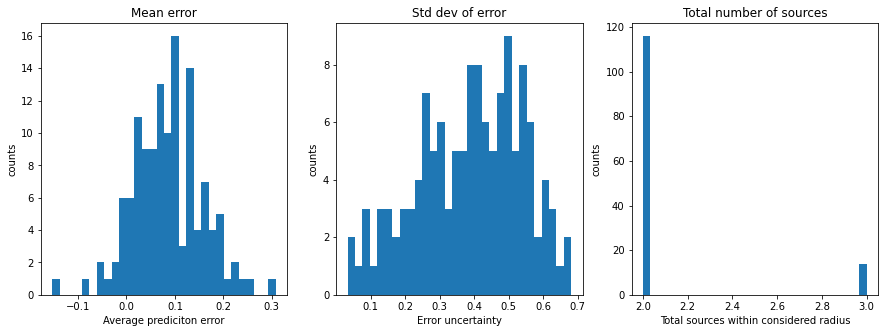

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.hist(concat_mean,bins=30)
#plt.yscale('log')
plt.xlabel('Average prediciton error')
plt.ylabel('counts')
plt.title('Mean error')

plt.subplot(1, 3, 2)
plt.hist(concat_std,bins=30)
#plt.yscale('log')
plt.xlabel('Error uncertainty')
plt.ylabel('counts')
plt.title('Std dev of error')

plt.subplot(1, 3, 3)
plt.hist(concat_tot,bins=30)
plt.xlabel('Total sources within considered radius')
plt.ylabel('counts')
plt.title('Total number of sources')

plt.savefig('../plots/trial.png')